# Definição do problema

### A empresa de telecomunicações contratou a A3Data para avaliar o cenário de churn elevado dos seus clientes e, uma vez que estamos falando de um produto com custo elevado de setup (instalação), a empresa gostaria de uma estratégia para reduzir esse churn.


In [1]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Carregar dados
data = pd.read_excel('/content/Customer-Churn.xlsx')

In [4]:
# Visualizar as colunas do dataframe
data.columns

# Visualizar as primeiras linhas do DataFrame para entender a estrutura dos dados
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7569-NMZYQ  Female              0     Yes        Yes      72          Yes   
1  8984-HPEMB  Female              0      No         No      71          Yes   
2  5989-AXPUC  Female              0     Yes         No      68          Yes   
3  5734-EJKXG  Female              0      No         No      61          Yes   
4  8199-ZLLSA    Male              0      No         No      67          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           Yes     Fiber optic            Yes  ...              Yes   
1           Yes     Fiber optic            Yes  ...              Yes   
2           Yes     Fiber optic            Yes  ...              Yes   
3           Yes     Fiber optic            Yes  ...              Yes   
4           Yes     Fiber optic            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0         Yes 

In [5]:
# Lidar com dados ausentes
data.dropna(inplace=True)  # Remover linhas com dados ausentes (ou aplicar outras estratégias de tratamento)

# Análise Exploratória

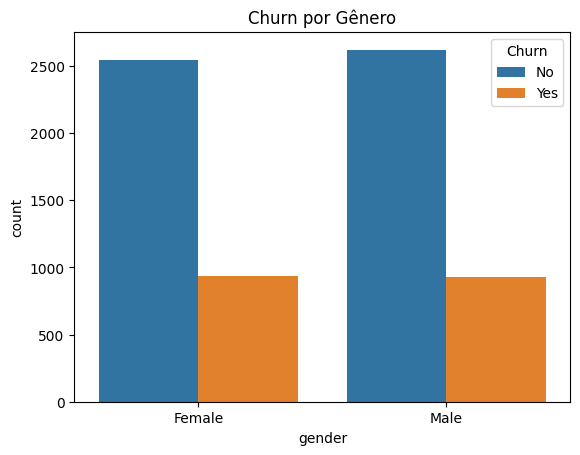

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Demográficas - Análise de churn por gênero
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn por Gênero')
plt.show()

### No gráfico resultante, você terá duas barras para cada categoria de gênero (masculino e feminino). Cada barra é dividida em duas cores, representando a quantidade de clientes que cancelaram (Churn=Sim) e a quantidade de clientes que não cancelaram (Churn=Não). A altura total da barra indica o número total de clientes para cada categoria de gênero.

- Se as barras são relativamente equilibradas em altura para ambas as categorias de gênero, isso sugere que o churn está distribuído de maneira semelhante entre homens e mulheres.
- Se uma das barras é significativamente mais alta do que a outra, isso indica uma disparidade na taxa de churn entre os gêneros.

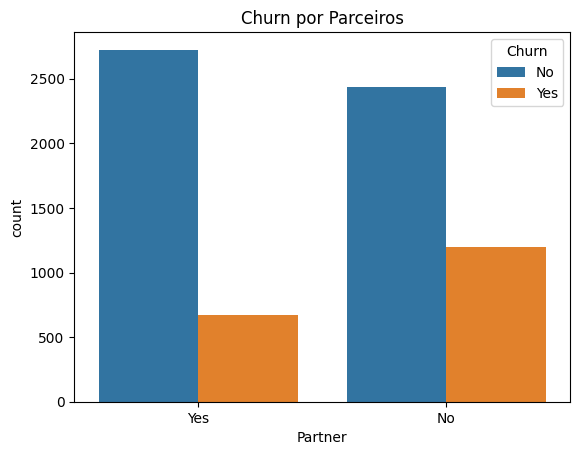

In [9]:
# 2. Parcerias e Dependências - Análise de churn por parceiros ou dependentes
sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Churn por Parceiros')
plt.show()

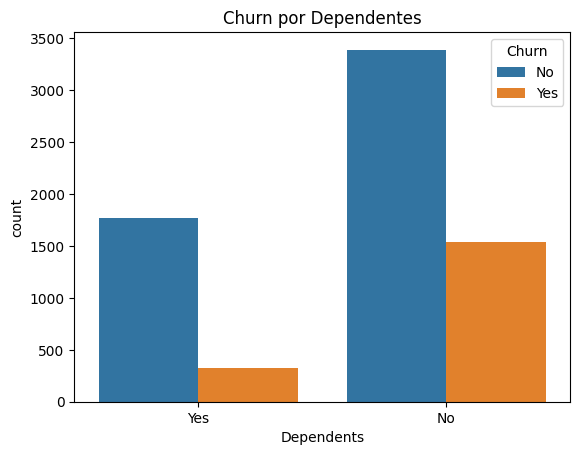

In [11]:
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Churn por Dependentes')
plt.show()

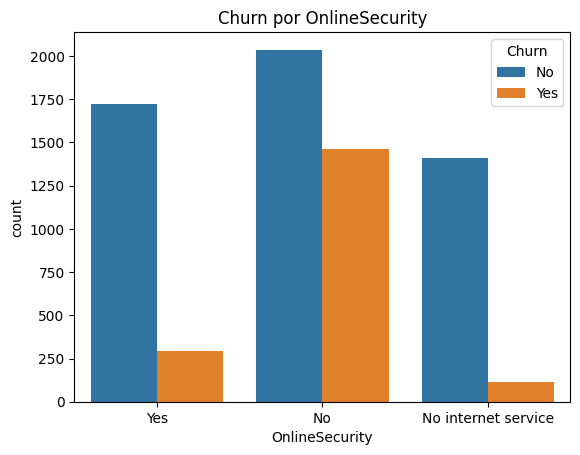

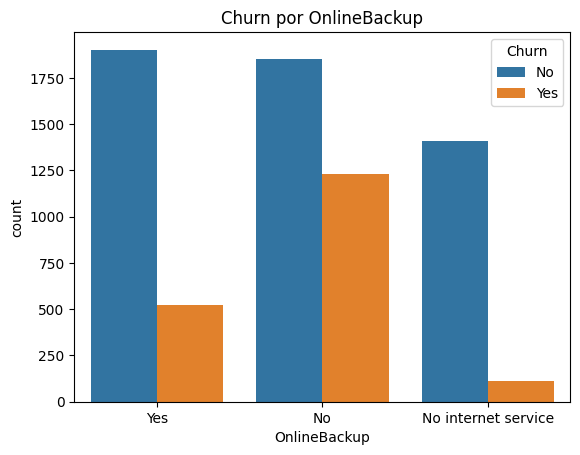

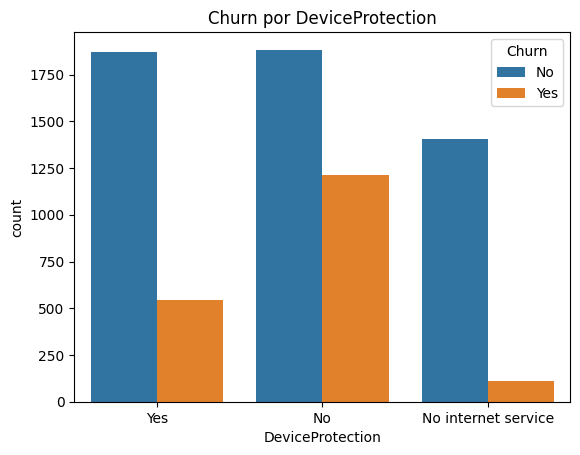

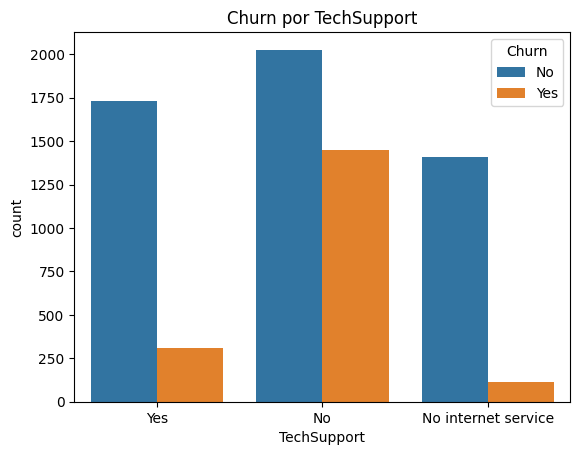

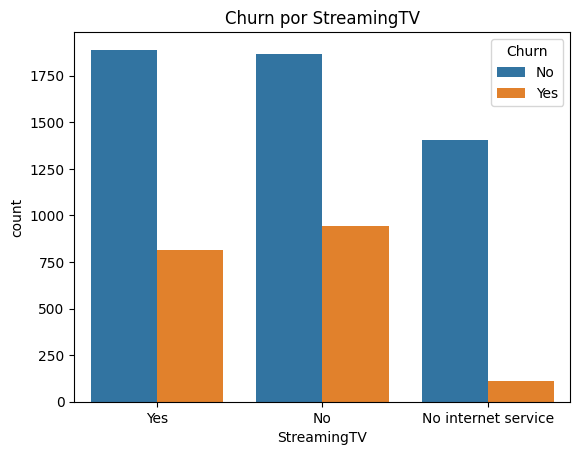

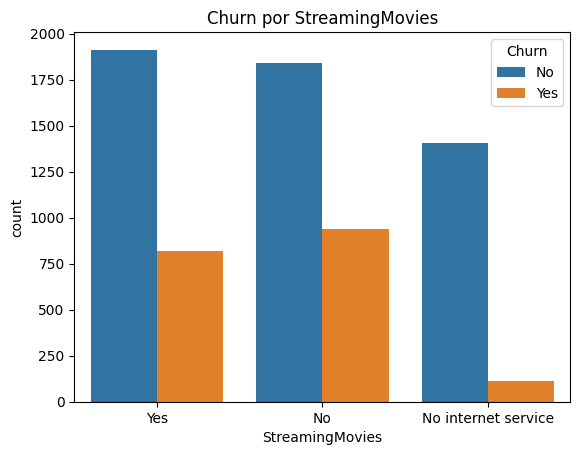

In [13]:
# 3. Serviços de Telecomunicações - Análise de churn por serviços adicionais
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for service in services:
    sns.countplot(x=service, hue='Churn', data=data)
    plt.title(f'Churn por {service}')
    plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Converter colunas categóricas para numéricas (usando Label Encoding)
label_encoder = LabelEncoder()
categorical_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
# Separar features (X) e target (y)
features = data.drop('Churn', axis=1)
target = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Padronizar as features (opcional, mas muitas vezes benéfico)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, predictions))
print("\nRelatório de Classificação:\n", classification_report(y_test, predictions))


Matriz de Confusão:
 [[896 131]
 [171 209]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1027
           1       0.61      0.55      0.58       380

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



## Visualização

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Supondo que você já tenha treinado seu modelo e feito previsões no conjunto de teste
predictions = model.predict(X_test)

# Matriz de confusão

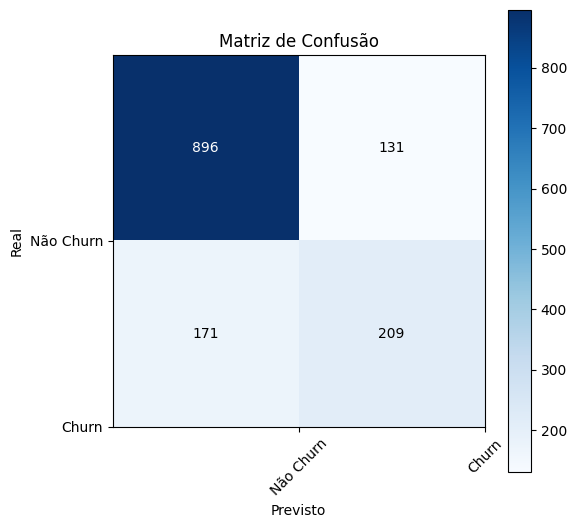

In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = ['Não Churn', 'Churn']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Previsto')
plt.ylabel('Real')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2.0 else "black")

plt.show()

# Curva ROC

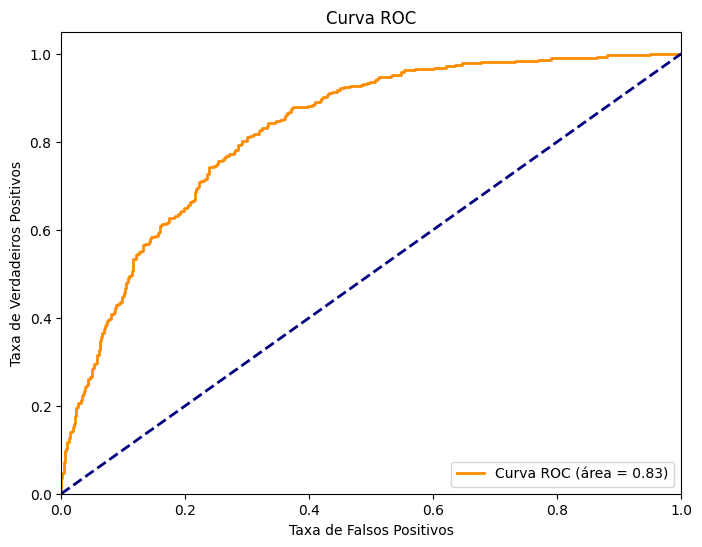

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A Curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica que ilustra o desempenho de um modelo de classificação binária em diferentes pontos de corte para a probabilidade de previsão. No contexto do problema de churn, ela mostra a taxa de verdadeiros positivos (sensibilidade) em relação à taxa de falsos positivos (1 - especificidade) para diferentes valores de limiar de decisão.

Na curva ROC para o problema de churn, você pode ajustar o limiar de decisão do modelo para equilibrar a sensibilidade e a especificidade conforme necessário para o contexto específico da empresa de telecomunicação.


# Outro modelo de ML para resolução do problema

## Resolução usando RandomForestClassifier, que é um algoritmo de ensemble baseado em árvores de decisão.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Criar e treinar o modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, rf_predictions))
print("\nRelatório de Classificação:\n", classification_report(y_test, rf_predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test, rf_predictions))


Acurácia: 0.7690120824449183

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1027
           1       0.59      0.47      0.52       380

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Matriz de Confusão:
 [[904 123]
 [202 178]]


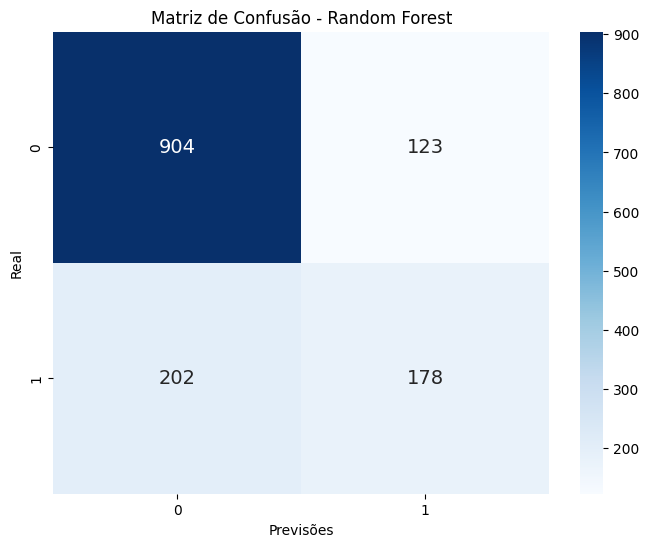


Relatório de Classificação - Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1027
           1       0.59      0.47      0.52       380

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliar o modelo com a matriz de confusão
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Visualizar a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()

# Exibir relatório de classificação
print("\nRelatório de Classificação - Random Forest:\n", classification_report(y_test, rf_predictions))


In [ ]:
# Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

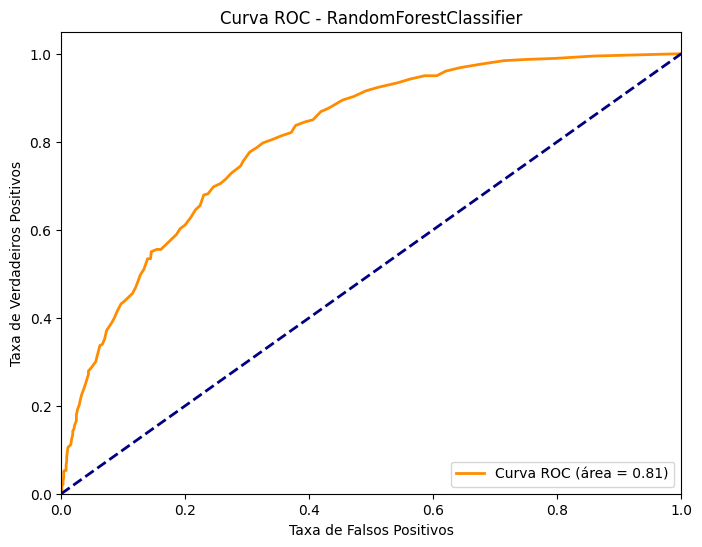

In [ ]:
# Gráfico da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

Este código utiliza o RandomForestClassifier para treinar um modelo de previsão de churn e avaliar seu desempenho. O código inclui métricas de avaliação, como acurácia, relatório de classificação e matriz de confusão. Além disso, é gerada a Curva ROC para visualizar o desempenho do modelo em diferentes pontos de corte.